# **Amazon Web Service - SaaS Sales Data Analysis**

Ngurah Bagus Arya Widiantara - JDSOL016 

***

## **Background**
**Amazon Web Services (AWS)** is a comprehensive cloud computing platform launched by Amazon in 2006. It provides a wide range of on-demand services, including computing power, storage, and databases, as well as machine learning, analytics, and Internet of Things (IoT) capabilities. AWS was developed to meet the growing need for scalable, reliable, and cost-effective infrastructure solutions, initially catering to Amazon's own internal requirements for e-commerce and later expanding to serve a diverse global customer base. With data centers located across multiple geographic regions, AWS ensures high availability and fault tolerance, enabling businesses to deploy applications quickly and efficiently. 

Over the years, AWS has consistently innovated, introducing a vast array of services that support various use cases, from startups to large enterprises. Today, AWS is recognized as a leader in the cloud computing industry, transforming the way organizations operate by enabling them to focus on innovation while outsourcing their infrastructure needs.

AWS approaches Software-as-a-Service (SaaS) as a business and software delivery model that enables organizations to provide their offering to customers in a low-friction and service-centric manner. Software-as-a-Service (SaaS) is a way of delivering applications remotely over the internet instead of locally on machines (known as “on-premise” software). AWS works with organizations to build a SaaS model that establishes agility and operational efficiency as pillars of their business strategy—promoting growth, reach, and innovation.

***

## **Business Problem**
Amazon Web Services as one of leader in cloud computing industry, now focus on transaction of SaaS selling sales and marketing software to other companies (B2B). In B2B business, there are many challenges that somehow we encountered along the way. The most significant is decrease in profit. 

Profit Loss can be caused by :
* Sales Performance (e.g. declining in sales growth, poor pricing product),
* Target Market Issues (e.g. customer segmentation, market saturation),
* Marketing Strategy (e.g. discount strategies, selling strategies)

Therefore, a comprehensive analysis are needed.

***

## **Goals**
* Finding the key-factor of things that related to profit.
* Enhance Profit.

***

## **Data**
This dataset contains transaction data from SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a single transaction/order (9,994 transactions), and the columns include: 

Dataset from [here](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales/data). 

### **Features**
**Original Dataset :**


| No. | **Attribute**    | **Description**                                          |
|-----| ---------------- | -------------------------------------------------------- |
| 1.  | **Row ID**       | A unique identifier for each transaction.                |
| 2.  | **Order ID**     | A unique identifier for each order.                      |
| 3.  | **Order Date**   | The date when the order was placed.                      |
| 4.  | **Date Key**     | A numerical representation of the order date (YYYYMMDD). |
| 5.  | **Contact Name** | The name of the person who placed the order.             |
| 6.  | **Country**      | The country where the order was placed.                  |
| 7.  | **City**         | The city where the order was placed.                     |
| 8.  | **Region**       | The region where the order was placed.                   |
| 9.  | **Subregion**    | The subregion where the order was placed.                |
| 10.  | **Customer**     | The name of the company that placed the order.           |
| 11.  | **Customer ID**  | A unique identifier for each customer.                   |
| 12.  | **Industry**     | The industry the customer belongs to.                    |
| 13.  | **Segment**      | The customer segment (SMB, Strategic, Enterprise, etc.). |
| 14.  | **Product**      | The product was ordered.                                 |
| 15.  | **License**      | The license key for the product                          |
| 16.  | **Sales**        | The total sales amount for the transaction.              |
| 17.  | **Quantity**     | The total number of items in the transaction             |
| 18.  | **Discount**     | The discount applied to the transaction.                 |
| 19.  | **Profit**       | The profit from the transaction.                         |

### Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


import warnings
warnings.filterwarnings("ignore")

### load dataset

Here are the first 5 rows and 5 last rows from dataset SaaS-Sales:

In [10]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


***
## **Data Understanding and Cleaning**
Before delving into the analysis, it is essential to gain a deeper understanding of our dataset in the data understanding phase. Through this process, we will identify any anomalies present in the dataset that need to be addressed during the data cleaning phase. 

### A. first step, checking information about dataset SaaS-Sales : 

In [12]:
print(f'Total Row and Columns from dataset : {df.shape}')
df.info()

Total Row and Columns from dataset : (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-

> first, Set Row ID as index:

In [14]:
df = df.set_index('Row ID')
df.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


> from info, we can check all the Dtypes from dataset :
> * `Order Date` Column is still an object; it would be easier to convert it to datetime64[ns].

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Order Date'].head()

Row ID
1   2022-11-09
2   2022-11-09
3   2022-06-13
4   2021-10-11
5   2021-10-11
Name: Order Date, dtype: datetime64[ns]

> * `Customer ID` Column is int64; In this column, there will be no numerical calculations, so it’s better to change it to a string (Object).

In [18]:
df['Customer ID'] = df['Customer ID'].astype(str)
df['Customer ID'].head()

Row ID
1    1017
2    1017
3    1056
4    1031
5    1031
Name: Customer ID, dtype: object

> drop Redundancy :
> * because `Order Date` already in datetime64[ns]; i think  we don't need `Date Key` anymore and can remove it.

In [20]:
df = df.drop(['Date Key'], axis=1)
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


> after these changes; final checking info() : 

In [22]:
print(f'Total Row and Columns from dataset : {df.shape}')
df.info()

Total Row and Columns from dataset : (9994, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         


### B. Checking Data Formatting:
Checking on Unique value in each column to see if there are any error in data format or typos.

In [24]:
# adjusting display options to show more rows and columns
pd.set_option('display.max_rows', None)  # show all rows
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.max_colwidth', None)  # show all content columns

# Creating a DataFrame to store unique values."
unique_values_df = pd.DataFrame({
    'Column': df.columns,
    'Unique (Count)' : [df[col].nunique() for col in df.columns],
    'Unique Values': [df[col].unique() for col in df.columns]
})
unique_values_df

,Column,Unique (Count),Unique Values
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bell, Deir

Summary from unique values:

* SaaS-Sales dataset has 18 columns and 9,994 rows, as indicated by the `Row ID` as Index. `License` column have the same count with Row ID, shows that all data has unique licenses.
* `Order ID` column is related to `Region`, as the initial code of the order ID indicates the region.
* `Order Date` column has a date range from 2020-01-04 to 2023-12-31
* `Contact Name` column contains individual names.
* `Country`,`City`,`Region`, and `Subregion` columns may represent different geographical classifications.
* `Customer`, and `Customer ID` columns indicate that each customer has a unique customer ID.
* `Industry` column represents various industry types.
* `Segment` column shows variations in segments.
* `Product` column indicates variations of each product.
* `Sales`,`Quantity`,`Discount`,and `Profit` columns contain varying numerical values and have different ranges.

### C. Checking Missing Value in each Column

In [27]:
# Percentage of missing values in each column.
df.isna().sum()/df.shape[0]*100

Order ID        0.0
Order Date      0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

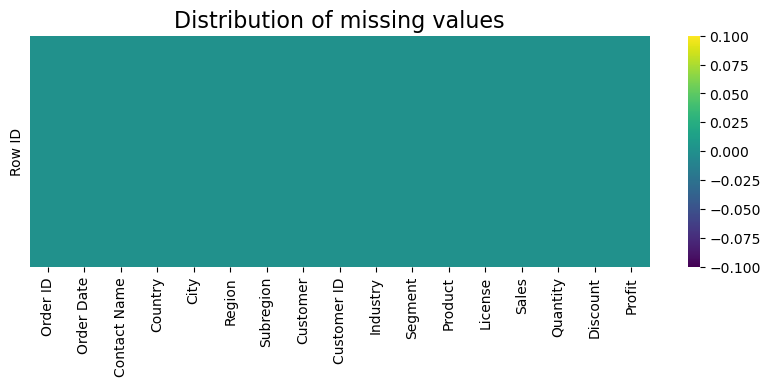

In [28]:
# Distribution of missing values in the data.
plt.figure(figsize=(10, 3))
sns.heatmap(df.isna(), cmap='viridis', cbar=True, yticklabels=False)
plt.title('Distribution of missing values', fontsize=16)
plt.show()

> Based on checking, it can be seen that there are **no missing values** in the percentage data, and the distribution graph also shows **all values are 0**, meaning there is no need to handle missing values in this dataset.

### D. Checking Duplicate Data

In [31]:
# Checking if there's duplicate
duplicates = df.duplicated()

# Show sum duplicate data
num_duplicates = duplicates.sum()
print(f'Total data duplicate in dataset: {num_duplicates}')

# Show Row Duplicate if there is duplicate
if num_duplicates > 0:
    print("duplicate row:")
    print(df[duplicates])
else:
    print("There's no duplicate in dataset.")

Total data duplicate in dataset: 0
There's no duplicate in dataset.


> Based on checking, this dataset is free from duplicate data.

### E. Showing Statistic Descriptive from dataset:

In [34]:
display(df.describe(), df.describe(include='object'))

,Order Date,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,623.245101,2.225110,0.206452,234.260108


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


Interpretation:

* Mean of `Sales` and `Profit` is approaching 75th percentile, which suggests there may be high-value sales affecting the data.
* There's a possibility that the data `Quantity` is normally distributed, as its mean is close to 50th percentile.
* Regarding the `Discount` data, 50th and 75th percentile data show similarity. This indicates that at least 75% of the data has a value that is equal to or smaller than that value. There's a possibility that the data is very centralized or that there are many similar values in the dataset, particularly at the upper end of the distribution.

### F. Checking Outliers

In [37]:
def Outliers_Check(df, cols):
    outlier_summary = []

    for col in cols:
        Q1 = df[col].describe()['25%']
        Q3 = df[col].describe()['75%']
        IQR = Q3 - Q1
        Upper_Fence = Q3 + (1.5 * IQR)
        Lower_Fence = Q1 - (1.5 * IQR)

        df_outliers = df[(df[col] < Lower_Fence) | (df[col] > Upper_Fence)]
        num_outliers = len(df_outliers)

        outlier_summary.append({
            'Column': col,
            'Lower Fence': Lower_Fence,
            'Upper Fence': Upper_Fence,
            'Num of Outliers': num_outliers
        })

         # Create a box plot for the current column
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.xlabel(col)
        plt.show()
        
    return pd.DataFrame(outlier_summary)

> Now, let's take a look at the outliers from the column regarding transaction details (`Sales`, `Profit`, `Discount`, `Quantity`):

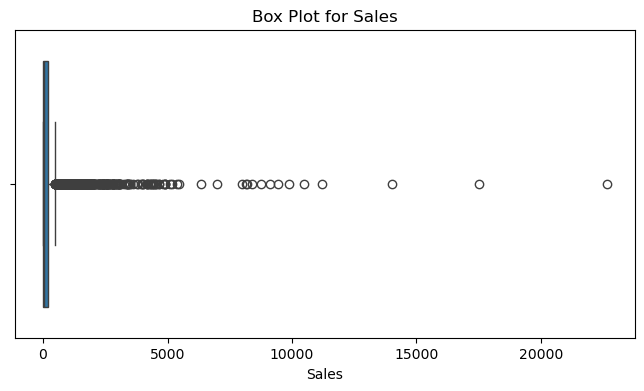

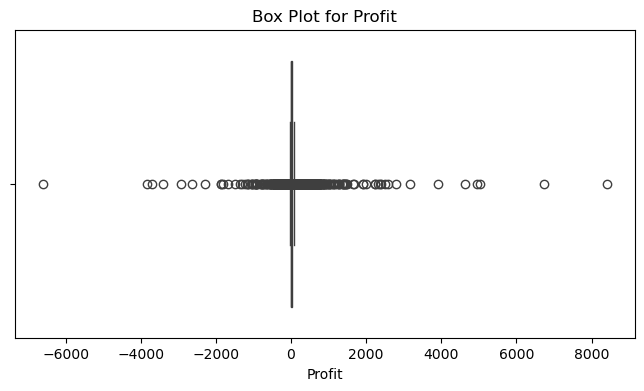

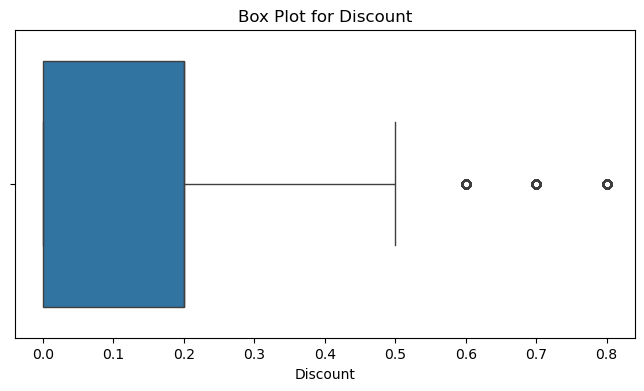

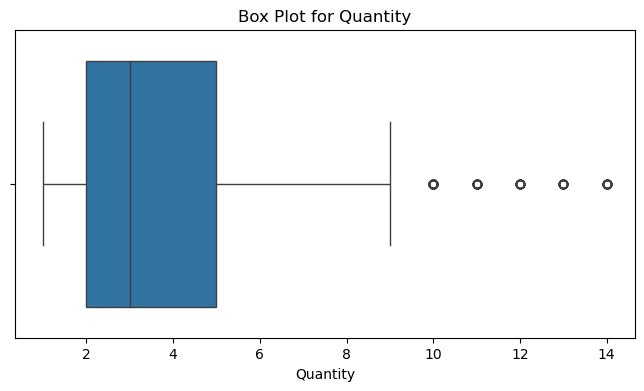

,Column,Lower Fence,Upper Fence,Num of Outliers
0,Sales,-271.710000,498.930000,1167
1,Profit,-39.724125,70.816875,1881
2,Discount,-0.300000,0.500000,856
3,Quantity,-2.500000,9.500000,170


In [39]:
outlier_results = Outliers_Check(df, ['Sales', 'Profit', 'Discount', 'Quantity'])
outlier_results

Several noticeable points for interpretation:

* Examining the four columns above, we observe negative values in the lower fence. We need to analyze this negative data to understand the underlying reasons.
* It appears there are high-value sales contributing to a positive skew in the `Sales` boxplot.
* Overall distribution of `Profit` seems symmetrical, but there are extreme values on both the negative and positive sides, which need to deepdive data distribution of `Profit`.
* Data clusters around 0.0 to 0.2, but the remaining data above this range contributes to a positive-skewed distribution.
* Most transactions involve `Quantity` of 2-5 units per purchase, but there are some data points exceeding the upper fence for Quantities, resulting in a positive-skewed distribution.

Based on the above interpretations, we believe there is no need to drop the outliers, as these outlier data points will be analyzed later. Removing them could lead to the loss of valuable insights in certain areas.

### G. Checking Data Distribution
Analyzing the distribution of data can reveal valuable insights and highlight any unusual trends. With a normality check, we can choose the appropriate analysis methods and perform data transformations if necessary, ensuring that the results are more accurate and reliable.

In [201]:
# Function to perform normality test
def normality_test(column):
    stat, p_value = stats.shapiro(column)
    return stat, p_value

# Applying the normality test to each column
results = {}
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    stat, p_value = normality_test(df[column])
    normality_result = 'Normal' if p_value > 0.05 else 'Not Normal'  # Determine normality
    results[column] = {
        'Distribution': normality_result
    }

# Display results
results_df = pd.DataFrame(results).T
results_df

,Distribution
Sales,Not Normal
Quantity,Not Normal
Discount,Not Normal
Profit,Not Normal


> Based on checking, it is found that the data for `Sales`, `Profit`, `Discount`, and `Quantity` has a not normal distribution. We can check from histogram as visual assestment.

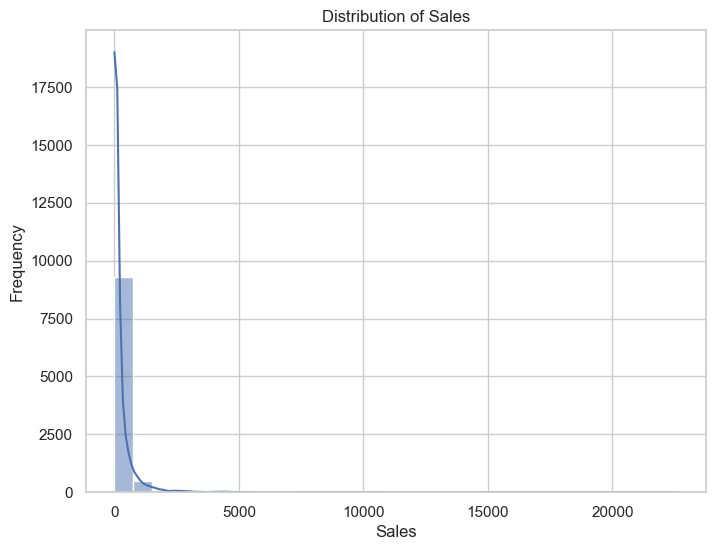

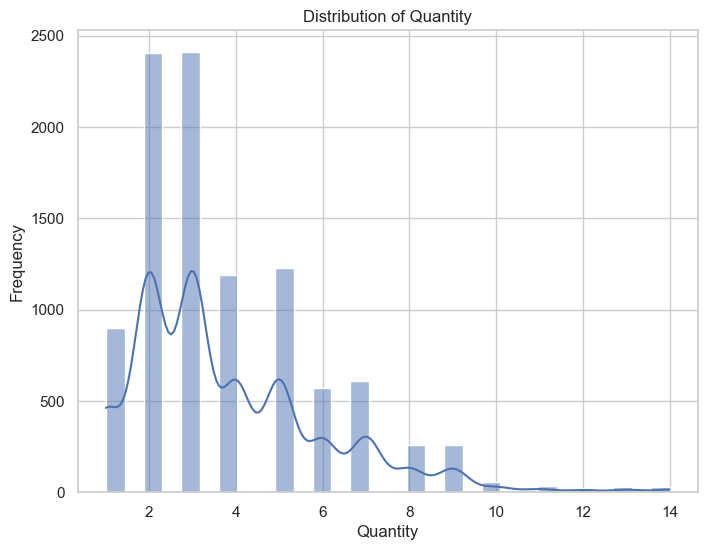

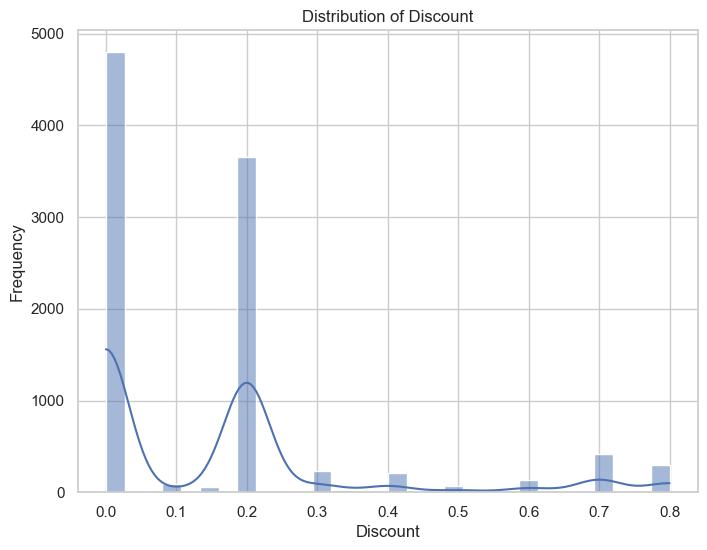

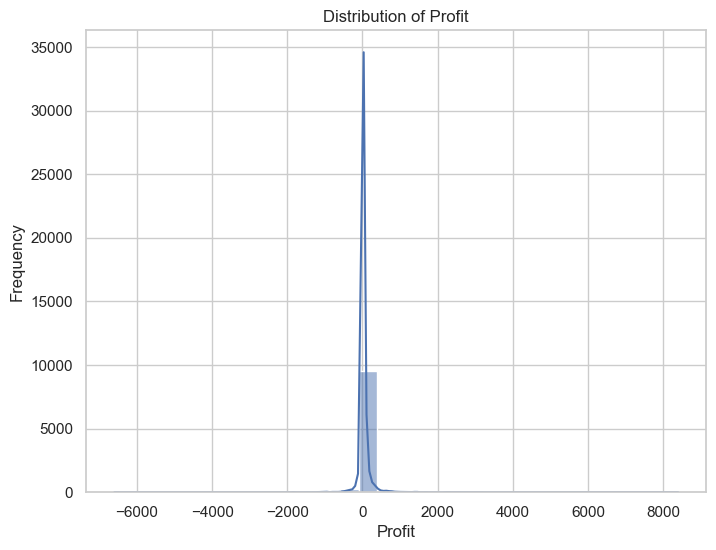

In [203]:
# Visualizing distributions
for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

***
## **Cleaned Data**
> We have finished cleaning the data, so we will save it as a new CSV file.

In [46]:
df.to_excel('SaaS-Sales-Cleaned.xlsx', index=False)

In [47]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


***
## **Data Analysis**
We have completed the data cleaning stage. Now, we can start analyzing to identify the key factors that influence B2B business profitability

### A. Sales Performances
The analysis focuses on sales performance:
* What correlation between `Sales`, `Quantity`, `Discount`, and `Profit`?
* What are the current `Sales` trends?
* Is there a decline in `Sales growth`?
* What is the difference between the `Sales` and `Quantity` trends compared to `Profit`?
* Which `Product` have the highest and lowest `Sales` and `Profit`?

#### First we need to know, what correlation between Sales, Quantity, Discount, and Profit?

In [51]:
def correlation_check ():
    # Select only the relevant columns
    df_columns = df[['Sales', 'Profit', 'Quantity', 'Discount']]
    
    # Calculate Spearman correlation
    correlation = df_columns.corr(method='spearman')
    
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Spearman Correlation Heatmap')
    plt.show()

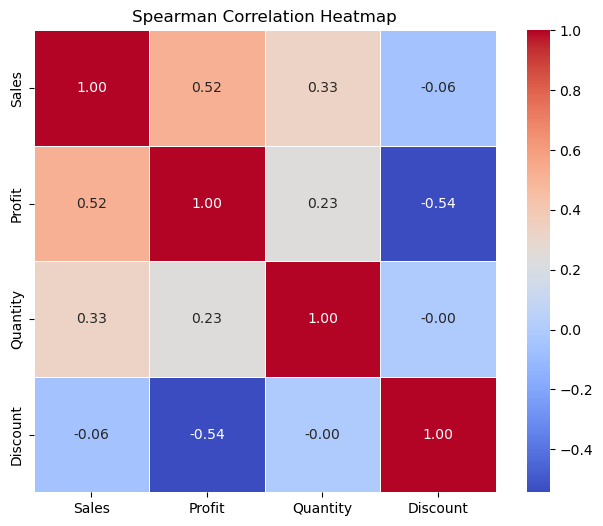

In [52]:
correlation_check ()

Interpretation Heatmap Correlation:
* the correlation between `Sales and Quantity`, `Sales and Discount`, are classified as a low correlation.
* the correlation between `Quantity` to others are low to medium, it indicates that there are many other key factors that influence profit.
* Based on the assessment, the correlation between `Profit and Discount` also `Sales and Profit` are classified as a medium correlation. Medium positive correlation suggests that as sales increase, profit tends to increase as well, but not perfectly. There are always other factors that can explain why sales do not always correlate strongly with profit.


#### What are the current `Sales` trends? Is there a decline in `Sales growth`?


> first, we need to check `Sales Trend Monthly`

In [56]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')

In [57]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

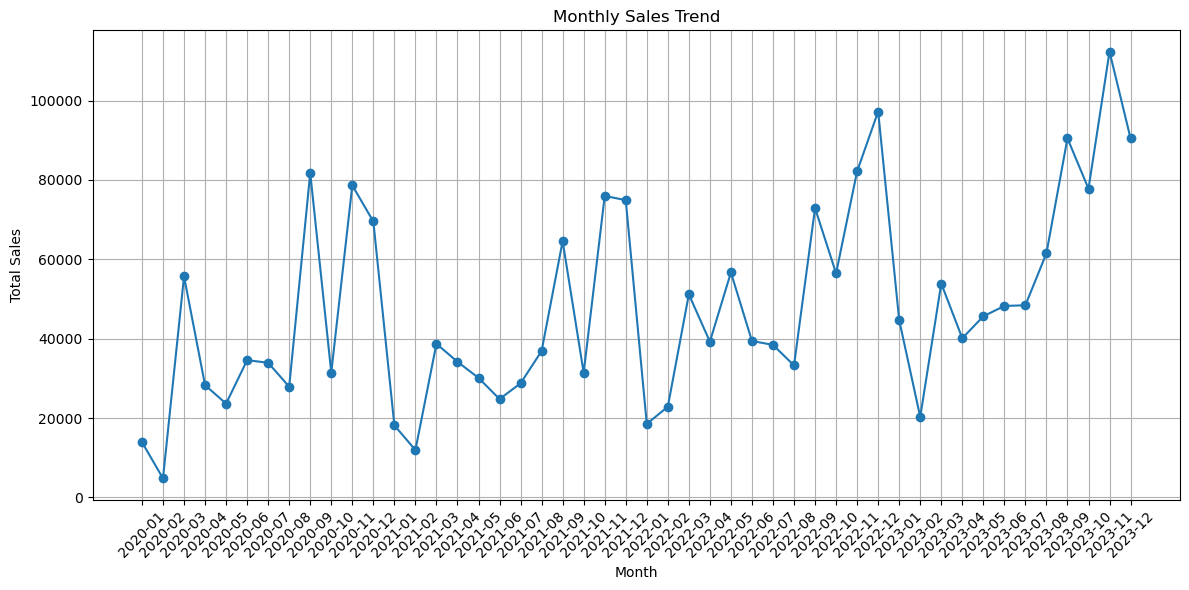

In [58]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

> and `Sales Trend Yearly`

In [60]:
df['Year'] = df['Order Date'].dt.year

In [61]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

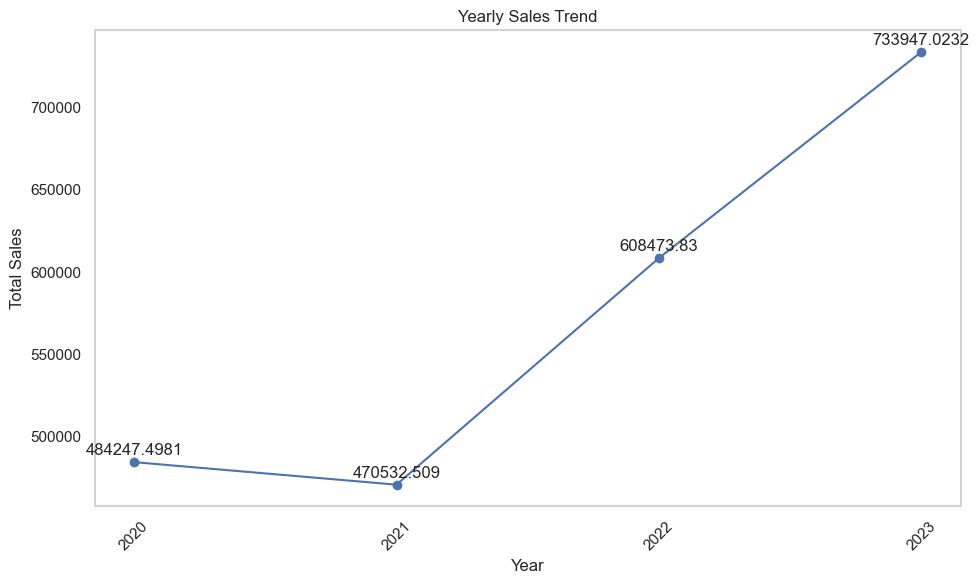

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales['Year'], rotation=45)
plt.grid()

for i, value in enumerate(yearly_sales['Sales']):
    plt.annotate(f'{value}', 
                 (yearly_sales['Year'][i], value), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center')
    
plt.tight_layout()
plt.show()

Interpretation : 
* from this trend, we can see there's decline sales in feb 20 and hit the lowest sales, it could be due to the initial onset of COVID, which caused panic around the world and as B2B company, it may also be affected by this.
* there is no decline in sales growth since in 2020-2023 COVID pandemic accelerated the adoption of cloud-based software solutions, which was a key driver of the post-pandemic recovery.
* as B2B company, AWS may be affected by COVID because many customer may changing plan because economic uncertainty. but as SaaS company, COVID case is most likely an opportunity. We can see increase sales significantly in march 20, and from 2021 onwards, the growth of SaaS Sales increase from yeay over year.

> source covid case timeline : https://www.cdc.gov/museum/timeline/covid19.html

#### What is the difference between the sales and quantity trends compared to profit?

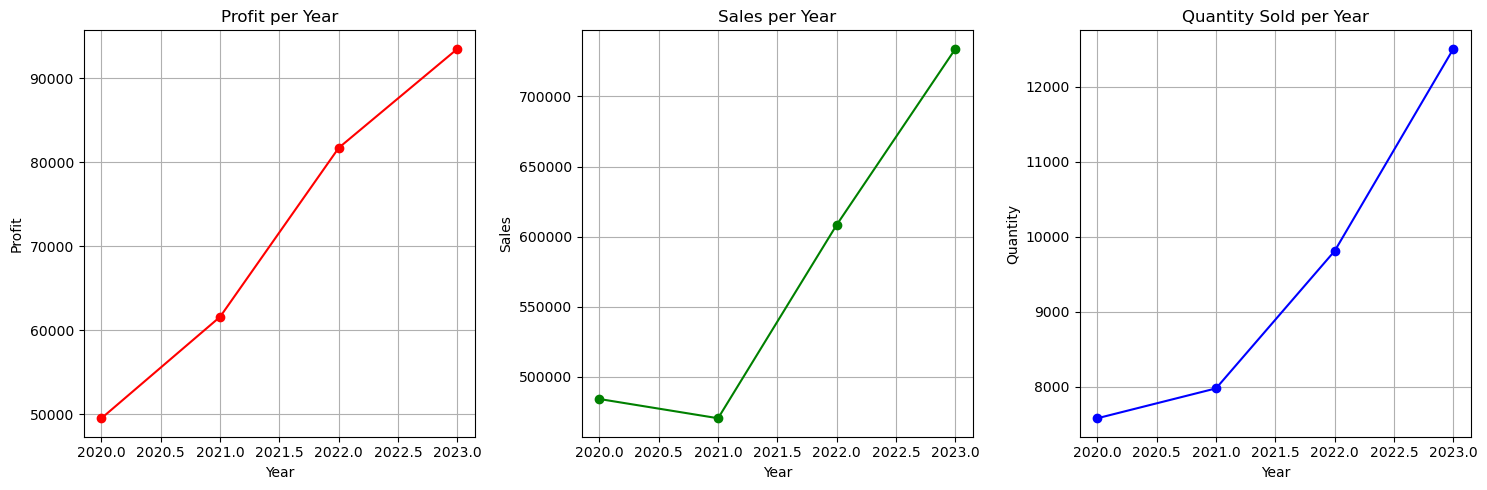

In [65]:
# Assume df is defined and contains the necessary data
df['Year'] = df['Order Date'].dt.year
df['Year'] = df['Year'].astype(int)

# Group by year and calculate yearly profit, sales, and quantity
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
yearly_quantity = df.groupby('Year')['Quantity'].sum().reset_index()

# Create a canvas with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot profit per year
axes[0].plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o', linestyle='-', color='red')
axes[0].set_title('Profit per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Profit')
axes[0].grid(True)

# Plot sales per year
axes[1].plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-', color='green')
axes[1].set_title('Sales per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

# Plot quantity sold per year
axes[2].plot(yearly_quantity['Year'], yearly_quantity['Quantity'], marker='o', linestyle='-', color='blue')
axes[2].set_title('Quantity Sold per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Quantity')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Interpretation : 
* When compared like this, it can be seen that profit, sales, and quantity sold continue to increase year by year from 2020 to 2023.
* There are many factors that influence profit; we can analyze it by looking at the `Profit Trend Monthly`.

> We need to check `Profit Trend Monthly`

In [68]:
monthly_profit = df.groupby('YearMonth')['Profit'].sum().reset_index()

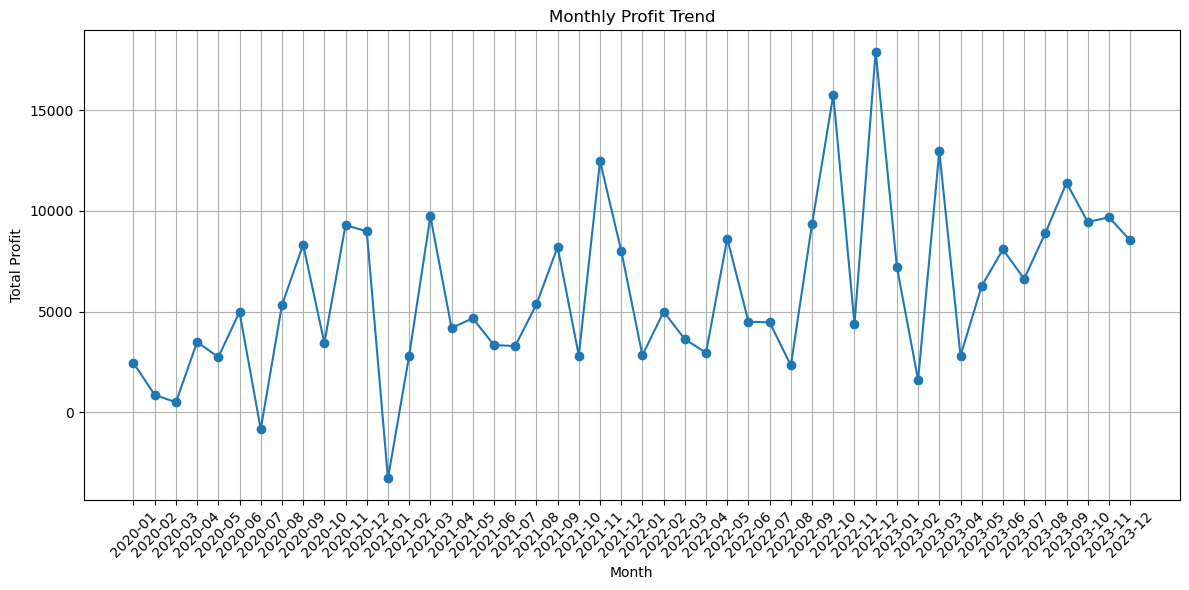

In [69]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit['YearMonth'].astype(str), monthly_profit['Profit'], marker='o')
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Interpretation :
* Looking at the profit trend per month above, it appears to be very variable, even reaching a low point in December 2020.
* In addition to external problems, a decline in profit can also occur due to internal issues, such as selling at a loss during new market penetration, which can be one of the reasons. we can check further when analyzing the product.

> source about market penetration : https://www.investopedia.com/terms/m/market-penetration.asp

* Besides internal marketing issues, **the Product itself** may also have problems or fail to meet business needs. Let's try to analyze the `Product`.

#### Which `Product` have the highest and lowest `Sales` and `Profit`?

In [283]:
def analyze_product_sales(dataframe, product_name=None):
    # If a specific product name is provided, filter the DataFrame
    if product_name:
        filtered_df = dataframe[dataframe['Product'] == product_name]
    else:
        filtered_df = dataframe

    # Further filter to only include rows where Discount > 0
    filtered_discount_df = filtered_df[filtered_df['Discount'] > 0]

    # Group by product_name and sum sales, profit, quantity, and sum discounts
    grouped_df = filtered_df.groupby('Product', as_index=False).agg({
        'Sales': ['sum', 'count'],  # Sum and count of sales
        'Profit': 'sum',            # Total profit
        'Quantity': 'sum',          # Total quantity sold
        'Discount': 'sum'           # Total discounts
    })

    # Rename the columns for clarity
    grouped_df.columns = ['Product', 'sales_sum', 'sales_count', 'Profit', 'Quantity', 'discount_sum']

    # Add discount_count only for those with discount > 0
    discount_count_df = filtered_discount_df.groupby('Product').agg({'Discount': 'count'}).reset_index()
    discount_count_df.columns = ['Product', 'discount_count']

    # Merge the discount_count results into grouped_df
    grouped_df = pd.merge(grouped_df, discount_count_df, on='Product', how='left')

    # Calculate profit percentages
    grouped_df['profit_per_sales'] = grouped_df['Profit'] / grouped_df['sales_count']
    grouped_df['profit_per_quantity'] = grouped_df['Profit'] / grouped_df['Quantity']
    grouped_df['discount_per_sales%'] = grouped_df['discount_count'] / grouped_df['sales_count']*100

    # Sort the DataFrame
    sorted_df = grouped_df.sort_values(by='profit_per_sales', ascending=False)

    return sorted_df

In [285]:
result_all_products = analyze_product_sales(df)
result_all_products

,Product,sales_sum,sales_count,Profit,Quantity,discount_sum,discount_count,profit_per_sales,profit_per_quantity,discount_per_sales%
0,Alchemy,149528.0300,68,55617.8249,234,11.00,46,817.909190,237.683012,67.647059
4,Data Smasher,167380.3180,775,41936.6357,2976,60.80,304,54.111788,14.091611,39.225806
11,Site Analytics,330007.0540,889,44515.7306,3289,137.40,578,50.073938,13.534731,65.016873
8,OneView,107532.1610,466,18138.0054,1729,77.60,195,38.922758,10.490460,41.845494
5,FinanceHub,340935.4150,981,32136.4203,3756,130.00,609,32.758838,8.556022,62.079511
1,Big Ol Database,189238.6310,115,3384.7569,440,35.20,86,29.432669,7.692629,74.782609
10,SaaS Connector Pack - Gold,16476.4020,254,6964.1767,906,20.40,102,27.418019,7.686729,40.157480
7,Marketing Suite - Gold,223843.6080,846,21278.8264,3158,63.20,316,25.152277,6.738070,37.352246
13,Support,125152.7440,1560,32864.4698,5825,117.20,586,21.066968,5.641969,37.564103
9,SaaS Connector Pack,91705.1640,957,13059.1436,3563,132.40,386,13.645918,3.665210,40.334378


Interpretation : 
* Product with the highest profit is `Alchemy` but kinda low on sales. It would be beneficial to further maximize Alchemy's sales to achieve optimal profit. There's probability that alchemy's pricing is too high, because profit margin per quantity sold is too high.
* Another noticeable data from this table is that `ContactMatcher` has the highest sales but a relatively low profit, indicating that it needs product reevaluation. The significant discounts provided on ContactMatcher (77,79%) appear to impact its profit, all according to the correlation results.
* The `Marketing Suite` has a negative profit-per-sales value. It have 73,68% of total item that have discount per sales count. Many factors could influence this situation; let’s shift to the graph to see the differences more clearly.

> from this table, the percentages are already noticeable, but it would be better to make insight with another visual assessment.

In [75]:
product_summary = df.groupby('Product').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

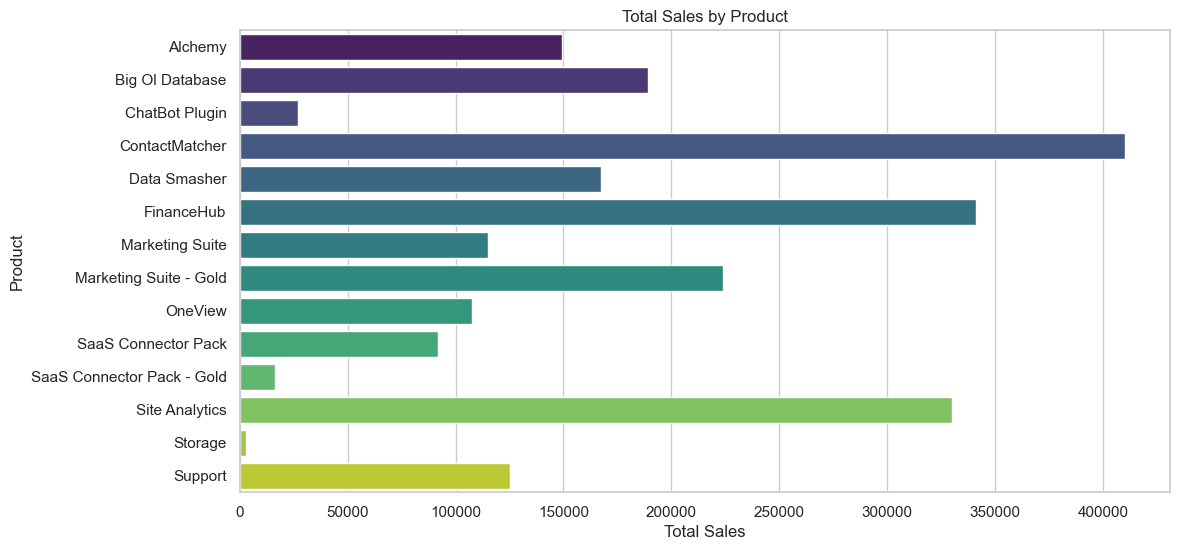

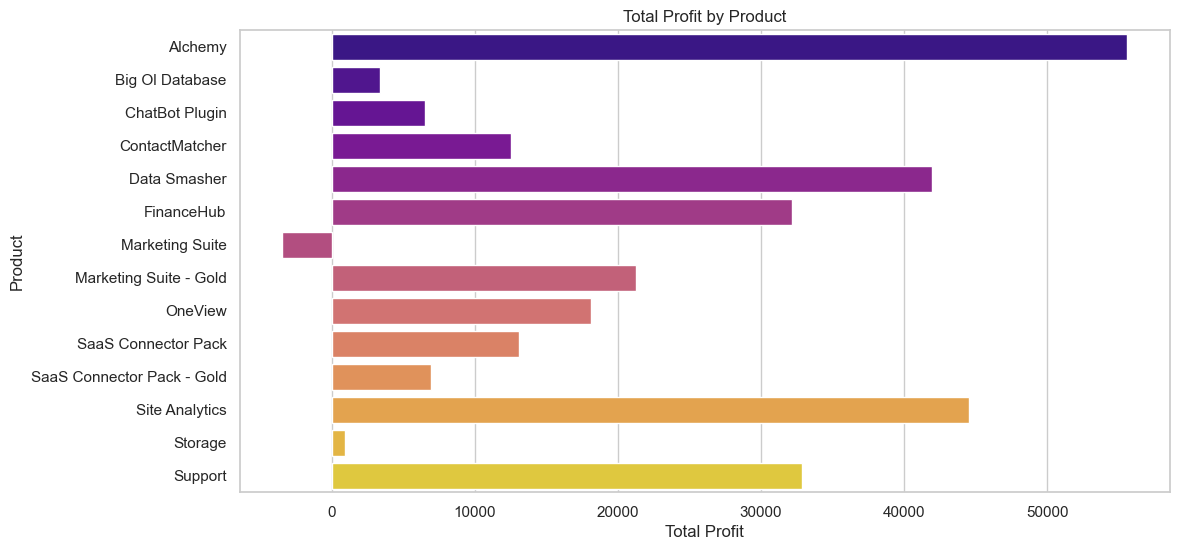

In [76]:
sns.set(style="whitegrid")
# Create a bar graph for total sales
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='Product', data=product_summary, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

# Create a bar graph for total profit
plt.figure(figsize=(12, 6))
sns.barplot(x='total_profit', y='Product', data=product_summary, palette='plasma')
plt.title('Total Profit by Product')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.show()

Interpretation : 
* It appears that the `Marketing Suite` product has interesting data. Marketing Suite product shows positive values on the sales graph but a negative value on the profit graph. This could be due to several factors:
     * Intentional loss with maximize discount to penetrate market, which resulting in strong sales data while temporarily sacrificing profit. 
     * Negative profit value for the Marketing Suite product could also occur if there are bad pricing and bad discount allocation.

> because `Marketing Suite` product not passed Profit Check (profit negative) we can do Discount check to verify that the discount is not greater than the sales price and Quantity check to ensure that the quantity is positive.

In [289]:
result_marketing_suite = analyze_product_sales(df, product_name='Marketing Suite')
result_marketing_suite

,Product,sales_sum,sales_count,Profit,Quantity,discount_sum,discount_count,profit_per_sales,profit_per_quantity,discount_per_sales%
0,Marketing Suite,114879.9963,228,-3472.556,868,48.14,168,-15.230509,-4.000641,73.684211


> as we check the discount. Our analysis regarding the `Marketing Suite` product being in a market penetration phase is might be correct, as the discounts provided 73,68% of sales transactions. This product might be in the market penetration phase now.
>
> the quantity of Marketing Suite seems not the problem, because no negative value.

Interpretation : 
* It is highly likely that the `Marketing Suite` product might be in the market penetration phase now, as it has high sales but still negative profit and after checking the discounts, enough to indicate that the product is doing penetrate to the market.

### B. Target Market Issues

The Analysis will focus on the impact of Market Segmentation on Sales and Profit.
* How is the distribution of `Sales` across each Customer Segment? like `Industry` and `Segment` columns
* Which Customer `Segment` and `Industry` have the highest and lowest `Sales` and `Profit`?
* How is the distribution of `Sales` across each `Country/City/Region/Subregion`?
* Which `Region` and `Subregion` have the highest `Sales` and `Profit`? In which countries and cities are they located? And which ones have the lowest?
* Is there a decline in `Sales` in certain `Country/City/Region/Subregion` on a monthly basis? This may indicate Market Saturation.

#### How is the distribution of Sales across each Customer Segment? like Industry and Segment columns

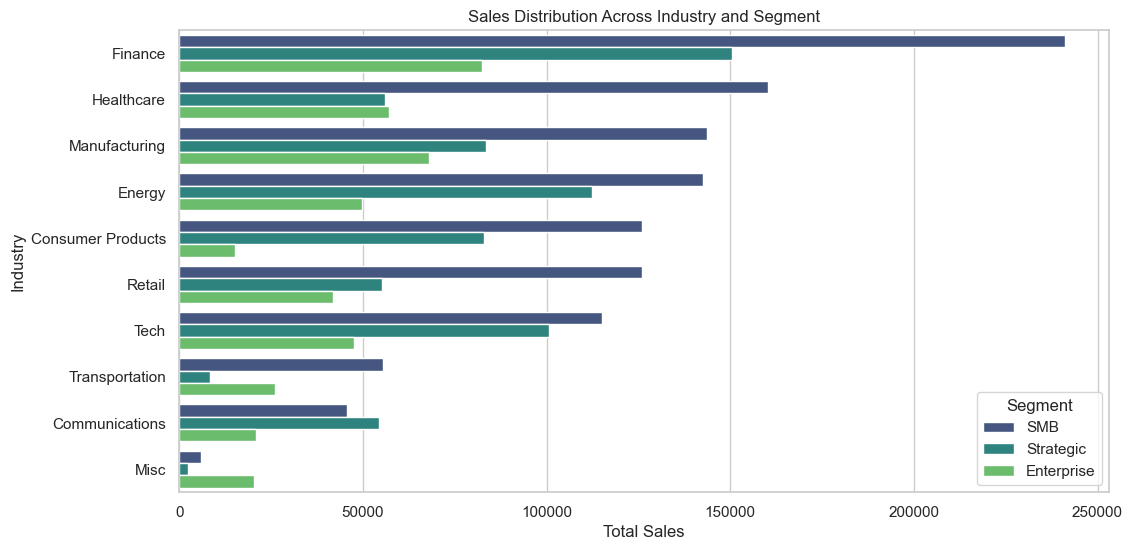

In [83]:
# Calculate total sales by Industry and Segment
sales_distribution = df.groupby(['Industry', 'Segment'], as_index=False).agg({'Sales': 'sum'})

# Sort the DataFrame by Sales in descending order
sales_distribution = sales_distribution.sort_values(by='Sales', ascending=False)

# Create a bar plot for Sales distribution across Industry and Segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Industry', hue='Segment', data=sales_distribution, palette='viridis')
plt.title('Sales Distribution Across Industry and Segment')
plt.xlabel('Total Sales')
plt.ylabel('Industry')
plt.legend(title='Segment')
plt.show()

> So, we need to check count of all unique in Industry to make better insight.

In [85]:
# Count occurrences of each unique entry in the 'Industry' column
industry_counts = df['Industry'].value_counts()

# Display the result
print(industry_counts)

Industry
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: count, dtype: int64


Interpretation : 
* The data above shows that the `Finance` industry is the primary customer segment for AWS SaaS in SMB (Small and Medium Business), Strategic, and Enterprise categories, followed by a large number of finance customers.
* Notably, the `Healthcare` industry performs quite well in sales of AWS SaaS products within the SMB segment, but there is room for enhancement in sales within the Strategic and Enterprise segments. This also applies to the `Manufacturing, Energy, Consumer Products, Retail, and Tech` industries.
* For the `Transportation` and `Communications` industries, each has less than 600 customers, indicating a need for sales enhancement in both sectors.
* For the `Miscellaneous` category, further clarification is needed for effective analysis.

#### Which Customer `Segment` and `Industry` have the highest and lowest Sales and Profit?

> we exclude `Misc` just because it needs more description to make better insight and recommendation.

In [89]:
# Filter DataFrame 
filtered_df = df[df['Industry'] != 'Misc']

sales_profit_summary = filtered_df.groupby(['Segment', 'Industry']).agg(total_sales=('Sales', 'sum'),
                                                                        total_profit=('Profit', 'sum')).reset_index()


highest_sales = sales_profit_summary.loc[sales_profit_summary['total_sales'].idxmax()]

lowest_sales = sales_profit_summary.loc[sales_profit_summary['total_sales'].idxmin()]

highest_profit = sales_profit_summary.loc[sales_profit_summary['total_profit'].idxmax()]

lowest_profit = sales_profit_summary.loc[sales_profit_summary['total_profit'].idxmin()]

# result
print("Highest Sales:", highest_sales)
print("Lowest Sales:", lowest_sales)
print("Highest Profit:", highest_profit)
print("Lowest Profit:", lowest_profit)

Highest Sales: Segment                 SMB
Industry            Finance
total_sales     241120.2914
total_profit     16306.9959
Name: 12, dtype: object
Lowest Sales: Segment              Strategic
Industry        Transportation
total_sales            8473.01
total_profit         1449.4938
Name: 26, dtype: object
Highest Profit: Segment                 SMB
Industry             Energy
total_sales     142548.2996
total_profit     23971.6794
Name: 11, dtype: object
Lowest Profit: Segment             Enterprise
Industry        Communications
total_sales          20984.494
total_profit         1038.4957
Name: 0, dtype: object


Interpretation : 
* Highest total sales come from the `Finance` industry in the SMB segment, but this does not mean it has the highest profit, as the largest profit is actually from the `Energy` industry in the SMB segment.
* Lowest total sales (excluding Miscellaneous) are from the `Transportation` industry in the Strategic segment, and the lowest profit comes from the `Communications` industry in the Enterprise segment. This data supports the previous statement that there is a need for increased sales in the Transportation and Communications industries to boost long-term profit.

#### How is the distribution of `Sales` across `Countries` and `Cities`?

> First, let's take a look at the sales distribution by country.

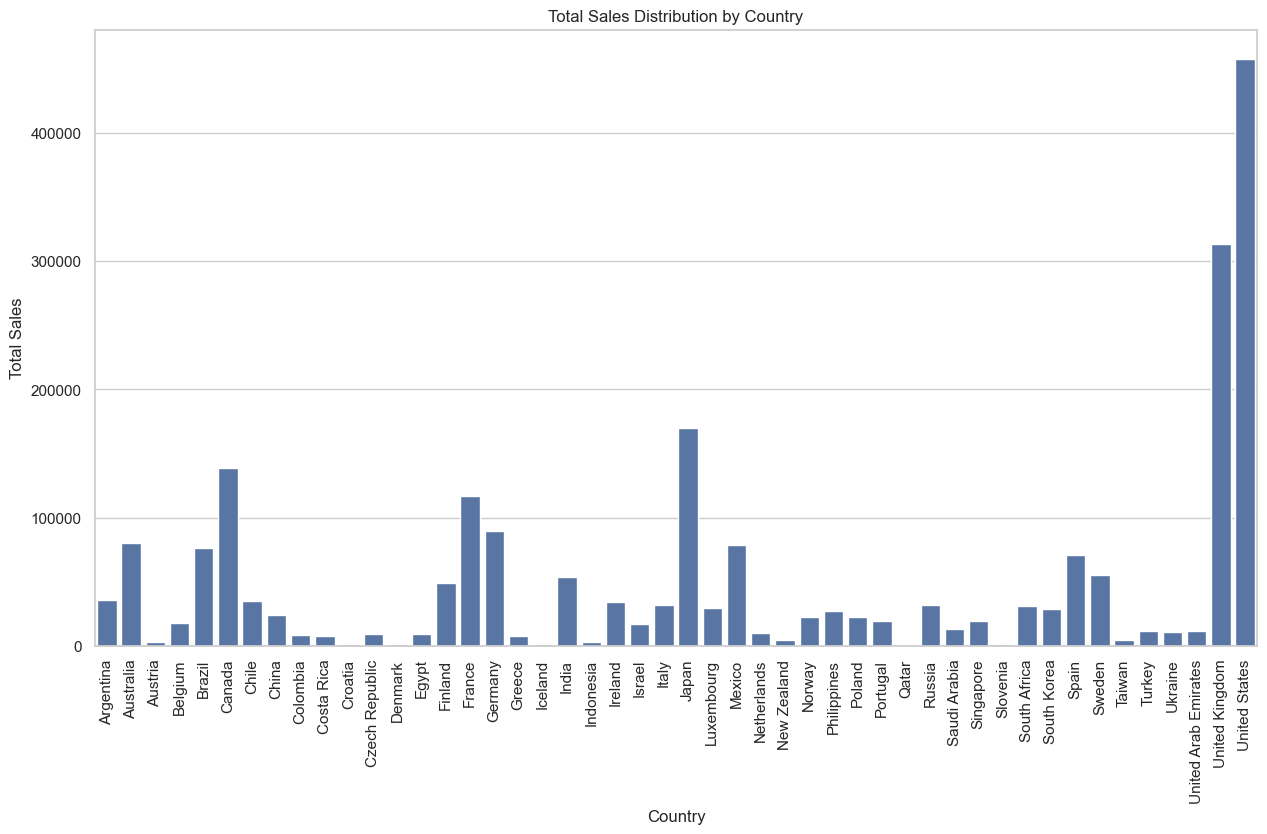

In [93]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Sales', data=sales_by_country)
plt.title('Total Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

Interpretation : 
* The highest sales of AWS SaaS are still to the United States, with the UK coming in second. As the parent company of the US, domestic sales of AWS SaaS are still considered quite good.
* This may also be attributed to AWS being B2B (Business to Business), with many companies from various industries having their parent companies in the US and UK.

> next, we check on detail on city each country

In [95]:
# Menghitung total sales berdasarkan negara dan kota
sales_distribution = df.groupby(['Country', 'City']).agg(
    total_quantity=('Quantity', 'sum'),
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

# Menampilkan unique countries
unique_countries = sales_distribution['Country'].unique()

# Mencari highest dan lowest city sales dan profit
results = {}

for country in unique_countries:
    country_data = sales_distribution[sales_distribution['Country'] == country]
    
    highest_sales_city = country_data.loc[country_data['total_sales'].idxmax()]
    lowest_sales_city = country_data.loc[country_data['total_sales'].idxmin()]
    
    highest_profit_city = country_data.loc[country_data['total_profit'].idxmax()]
    lowest_profit_city = country_data.loc[country_data['total_profit'].idxmin()]
    
    results[country] = {
        'Highest Sales City': highest_sales_city['City'],
        'Highest Sales': highest_sales_city['total_sales'],
        'Lowest Sales City': lowest_sales_city['City'],
        'Lowest Sales': lowest_sales_city['total_sales'],
        'Highest Profit City': highest_profit_city['City'],
        'Highest Profit': highest_profit_city['total_profit'],
        'Lowest Profit City': lowest_profit_city['City'],
        'Lowest Profit': lowest_profit_city['total_profit']
    }

# Mengonversi hasil ke DataFrame
results_df = pd.DataFrame(results)

# Mentraspose tabel
transposed_results_df = results_df.T
transposed_results_df

,Highest Sales City,Highest Sales,Lowest Sales City,Lowest Sales,Highest Profit City,Highest Profit,Lowest Profit City,Lowest Profit
Argentina,Buenos Aires,17640.846,Mendoza,4088.6,Buenos Aires,3957.981,Mendoza,1293.7747
Australia,Sydney,48539.541,Gold Coast,866.202,Perth,53.6582,Sydney,-6654.5688
Austria,Vienna,2865.02,Vienna,2865.02,Vienna,1059.5893,Vienna,1059.5893
Belgium,Brussels,11378.941,Ghent,2107.072,Ghent,169.3108,Brussels,-1208.2793
Brazil,São Paulo,44738.904,Manaus,1742.806,São Paulo,13939.3011,Manaus,467.2066
Canada,Toronto,119595.972,Victoria,3.856,Toronto,29176.8289,Victoria,1.3978
Chile,Santiago,23490.102,Antofagasta,5006.836,Puente Alto,161.0428,Santiago,-3112.6282
China,Beijing,6156.842,Chengdu,43.8,Guangzhou,1998.2733,Chengdu,20.586
Colombia,Bogotá,4200.6,Cali,139.8,Bogotá,893.6798,Cali,25.5435
Costa Rica,San José,7464.93,San José,7464.93,San José,2037.0942,San José,2037.0942


Interpretation : 
* From here, we can see that there are cities with the highest sales but also the lowest profit, even reaching negative profit, as is the case in the following areas:
    - Sydney, Australia
    - Brussels, Belgium
    - Santiago, Chile
    - Paris, France	
    - Berlin, Germany	
    - Tokyo, Japan
    - Moscow, Russia
    - Johannesburg, South Africa
    - Gothenburg, Sweden

    This may be due to market penetration in those areas, which shows enhanced sales but not yet profit.

* A noticeable thing can also be seen in countries that are only distributed in one region/city, such as:
    - Vienna, Austria
    - San José, Costa Rica
    - Zagreb, Croatia
    - Copenhagen, Denmark
    - Cairo, Egypt
    - Reykjavík, Iceland
    - Luxembourg, Luxembourg
    - Ljubljana, Slovenia
    - Taipei, Taiwan

    In this case, there is a need for new market research to avoid market saturation, which occurs when the growth of a product reaches a point of stagnation or saturation.

    source : https://www.investopedia.com/terms/m/marketsaturation.asp

#### Which Region and Subregion have the highest Sales and Profit? And which ones have the lowest?

In [98]:
region_subregion_distribution = df.groupby(['Region', 'Subregion']).agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

region_subregion_distribution

,Region,Subregion,total_sales,total_profit
0,AMER,LATAM,241520.7030,17642.9510
1,AMER,NAMER,596328.9015,109784.0388
2,APJ,ANZ,84949.6230,-11450.7709
3,APJ,APAC,106771.2120,30311.1778
4,APJ,IND,53555.3600,18382.9363
5,APJ,JAPN,170188.0458,-25729.3563
6,EMEA,EU,32114.6100,8401.8004
7,EMEA,EU-EAST,76118.1140,3864.4893
8,EMEA,EU-WEST,384065.6140,26706.6029
9,EMEA,MEA,76793.6960,7200.1468


> let's check the graph as visual assesment

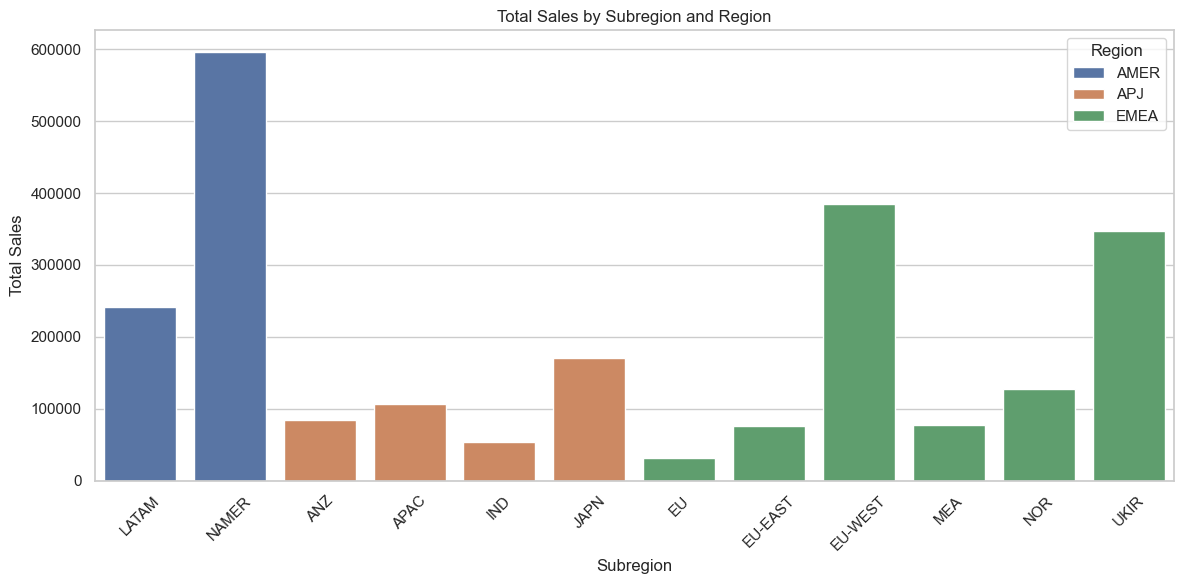

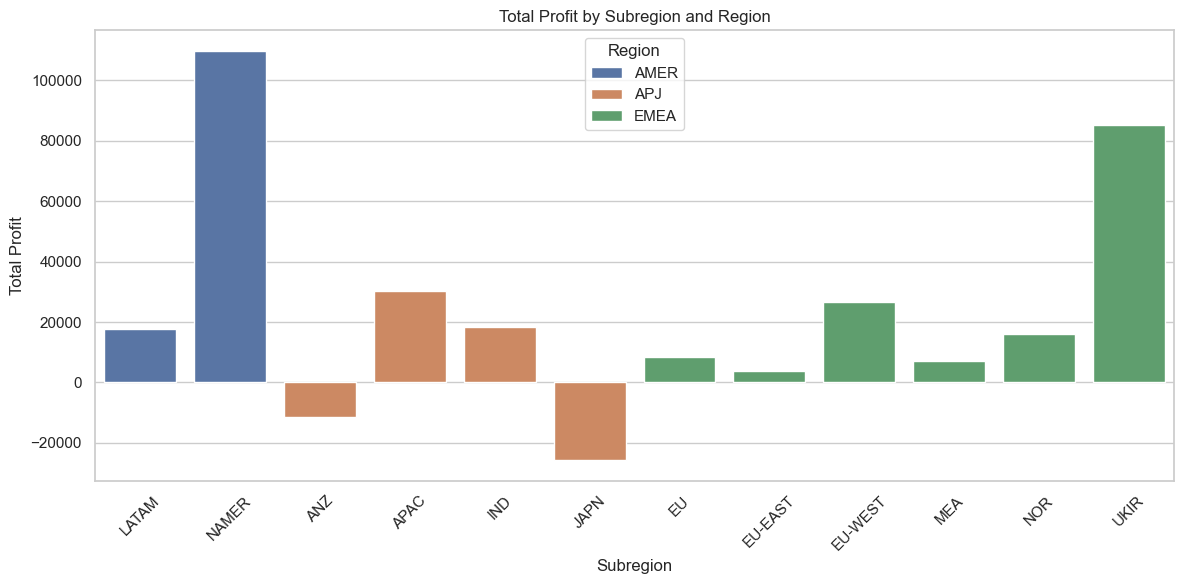

In [100]:
# graph bar for total sales 
plt.figure(figsize=(12, 6))
sns.barplot(x='Subregion', y='total_sales', hue='Region', data=region_subregion_distribution)
plt.title('Total Sales by Subregion and Region')
plt.xlabel('Subregion')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Graph for total profit
plt.figure(figsize=(12, 6))
sns.barplot(x='Subregion', y='total_profit', hue='Region', data=region_subregion_distribution)
plt.title('Total Profit by Subregion and Region')
plt.xlabel('Subregion')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

Interpretation : 
* From here, we see that the ANZ (Australia and New Zealand) and JAPN (Japan) subregions experience positive sales but negative profit values. This aligns with the previous analysis indicating market penetration in the ANZ and JAPN areas, such as in Sydney (Australia), and Tokyo (Japan). Other sales in those regions have not been able to contribute to making the data positive.
* The APJ (Asia-Pasific + Japan) region is the lowest contributor to both profit and sales.

#### Is there a decline Sales on monthly basis in United States and United Kingdom as top 2 Countries Sales? This may indicate Market Saturation.

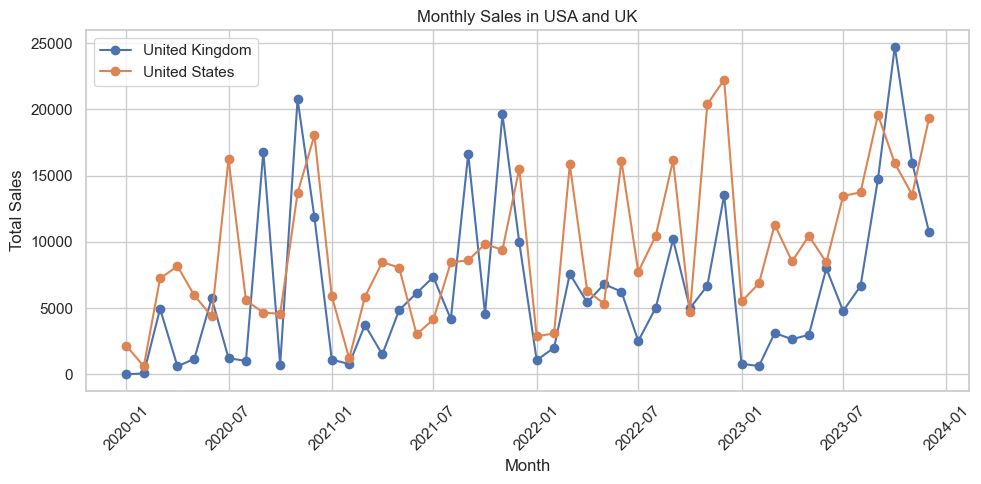

In [103]:
# Filter for USA and UK
filtered_df = df[df['Country'].isin(['United States', 'United Kingdom'])]

# Calculate total sales per month and country
monthly_sales = filtered_df.groupby(['Country', 'YearMonth']).agg(Total_Sales=('Sales', 'sum')).reset_index()

# Visualization
plt.figure(figsize=(10, 5))
for country in monthly_sales['Country'].unique():
    country_data = monthly_sales[monthly_sales['Country'] == country]
    plt.plot(country_data['YearMonth'].dt.to_timestamp(), country_data['Total_Sales'], marker='o', label=country)

plt.title('Monthly Sales in USA and UK')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Interpretation : 
* In the monthly sales trend graph of these two countries, there are many variations of rising and falling lines. The presence of multiple declines within a single year could be an early indication of a `Saturated Market`. 

### C. Marketing Strategy Issues
Analysis will focus on the impact of Marketing Strategies on Profit:
* Is there an impact of `Discounts` on `Profit`?
* How can we analyze `Discounts` ?


#### Is there an impact of `Discounts` on `Profit`?

 > First, let's display the previous heatmap correlation data from regular function.

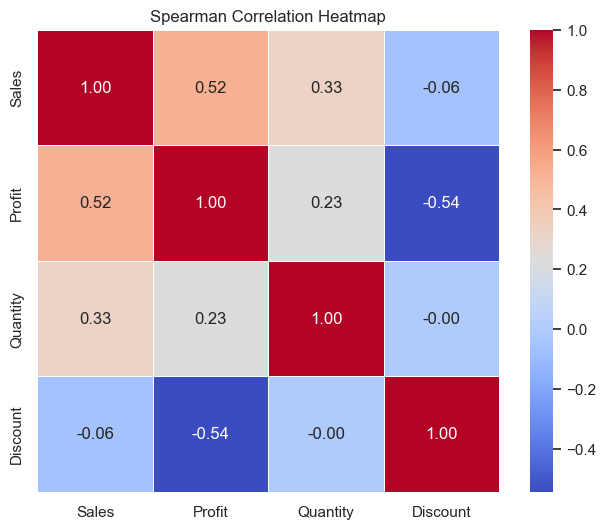

In [108]:
correlation_check ()

Interpretation : 
* `Discount` data has a medium correlation with `Profit`, so changes in discounts significantly impact the increase in profit.

#### How can we analyze `Discounts` on `Profit`?

> first, we need to make segmentation of discounts

In [111]:
def segment_discount(Discount):
    if Discount == 0:
        return 'No Discount'
    elif Discount <= 0.05:
        return ' <5% Discount'
    elif Discount <= 0.10:
        return '<10% Discount'
    elif Discount <= 0.15:
        return '<15% Discount'
    elif Discount <= 0.20:
        return '<20% Discount'
    else:
        return 'Over-High Discount'

df['discount_segment'] = df['Discount'].apply(segment_discount)

> Since the values of discount and profit are not normally distributed, the center of deviation should use the median.

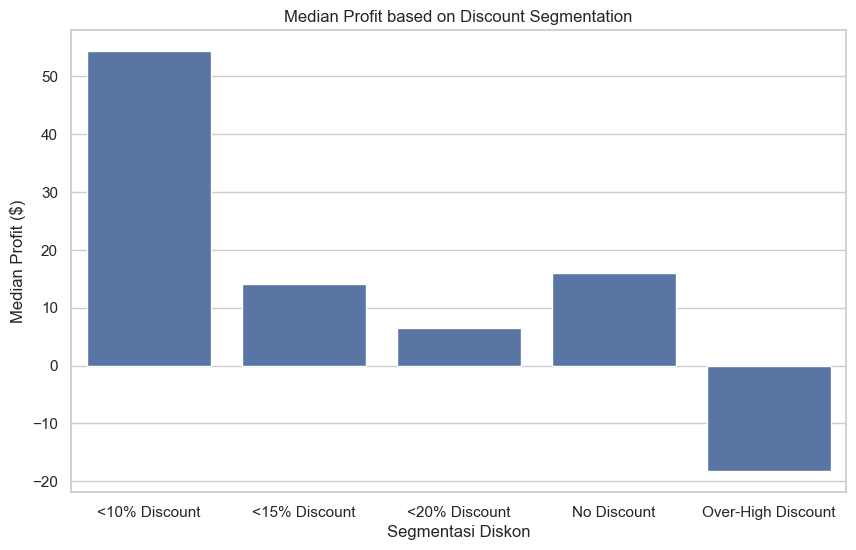

In [307]:
# calculate median profit per segmen
segment_analysis = df.groupby('discount_segment')['Profit'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='discount_segment', y='Profit', data=segment_analysis)
plt.title('Median Profit based on Discount Segmentation')
plt.xlabel('Segmentasi Diskon')
plt.ylabel('Median Profit ($)')
plt.show()

Interpretation : 
* It is evident that discount values significantly influence profit.
* Products with over-high discounts (above 20%) have the lowest median profit. Such over-high discounts typically occur when a product aims to penetrate the market or just bad at discount allocation.
* There needs to be a balance in providing discounts to better maintain profit values, possibly by limiting discount per quantity sold.

> For limiting the quantity purchased per discount, we need to check correlation Quantity and Discount

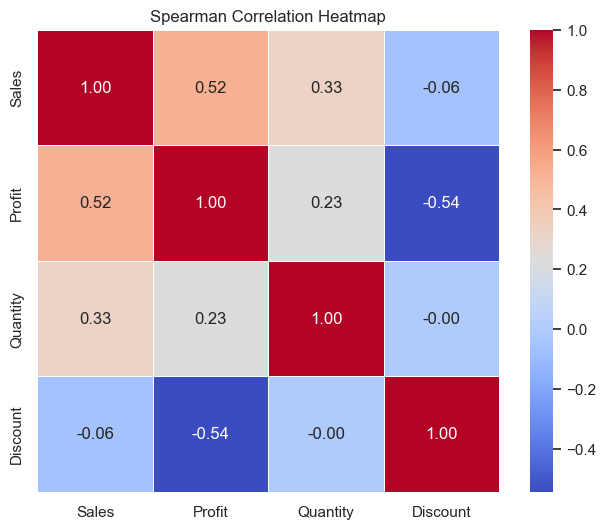

In [117]:
correlation_check ()

Interpretation : 
* There is zero correlation between `Quantity` and `Discount`. This means that the provision of discounts is not related to transaction quantity; we can easily see that there is a mismatch in the allocation of discounts.

> we need to check unique value from quantity to see behaviour customer about quantity sold.

In [120]:
unique_quantities_sorted = sorted(df['Quantity'].unique())
unique_quantities_sorted

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Interpretation : 
* From here, we have the quantity per transaction from customers. By observing this `Quantity Behaviour`, we can recommend discount values based on the purchase quantity per transaction, such as:
    - no discount : 1 - 2
    - discount 1  : 3 - 5
    - discount 2  : 6 - 9
    - discount 3  : 10 - 12
    - discount 4  : 13 up

***
## **Conclusions & Recommendations** 

**Conclusions**

Based on the EDA above, it can be concluded that:

* AWS sales have increased year over year, which corresponds with the quantity of products sold. This indicates that the company is not only gaining profits and increasing sales but also suggests that the market conditions in 2020 - 2023 are quite favorable.

* The year 2020 saw a significant surge in SaaS adoption as many companies shifted to digital solutions to support remote work. The COVID pandemic acted as an accelerator for web services companies, and AWS also experienced substantial user growth.

* It is highly likely that the `Marketing Suite` product might be in the market penetration phase now, as it has high sales but still negative profit and after checking the discounts, enough to indicate that the product is doing penetrate to the market.

* The `ContactMatcher` product has the highest sales but a relatively low profit, indicating that it needs reevaluation. This may be due to poor pricing or ineffective discount strategies. The significant discounts on ContactMatcher appear to negatively impact its profit, according to the correlation results.

* The product with the highest profit is `Alchemy`, but it has relatively low sales. It would be beneficial to further maximize Alchemy's sales to achieve optimal profit. There's probability pricing in alchemy too high because profit margin is too high. As now, the difference in the data values is too significant, the 1st profit-per-quantity `Alchemy` reach 237.68 and the 2nd product `Data Smasher` reach amount 14.09 profit-per-quantity.

* The `Healthcare, Manufacturing, Energy, Consumer Products, Retail, and Tech` industries perform well in the `SMB (Small and Medium Business)` segment, but there is still potential to enhance sales in the `Strategic` and `Enterprise` segments.

* Sales and Profit in the `Transportation` and `Communications` industries are the lowest, indicating the need for efficient sales movement.

* Market saturation actually requires a combination of quantitative and qualitative analyses. However, we can see early indications by observing whether there is a decline in monthly sales in a particular area. Thus, there is a need for market expansion in the top two countries, such as the USA and UK.

* The `APJ` region is the lowest contributor to both profit and sales, even have negative profit on `JAPN` and `ANZ`.

* Out of 5,009 transactions, there are various types of normal discounts up to over-high discounts. By leveraging customer behavior per transaction, we can determine a range of product discounts without harming profit.

**Recommendations**

Suggestions and recommendations expected to address the problem statements outlined in this research are as follows:

* Improvement of Pricing for the `Marketing Suite` Product; We think this product already done halfway marketing penetration phase, 
    - we need to quietly raise the price, so that the product can regain profitability.
    - or by limiting the number of customers who receive discounts[[1]](https://blog.hubspot.com/sales/price-saas-product). you might lower your product’s fees by 50%, but only for the first 10 business customers. next customer get normal discount based on discount allocation. 

* Discount Adjustment for `ContactMatcher`; There needs to be an improvement in profit for the ContactMatcher product so we need to create new discount allocation (which will be explained below).

* Maximizing `Alchemy` Sales; Further efforts should be made to maximize Alchemy sales to achieve optimal profit, such as :
   - Penetrate more new market with offering more discounts on the alchemy product, as it still has a sufficient profit margin.
   - Or price adjustments of alchemy product, slight reduction in price might attract more buyers. At least price still can head to head with competitor[[2]](https://www.g2.com/products/alchemy/pricing), like around 50-60$/month. We should carefully about making price adjustment because it is related to profit margins.
     
* Enhancing Efficient Sales Movement in the Industry `Transportation` and `Communications`:
    - There is a need for mapping and presenting the benefits of sales to each industry facing issues[[3]](https://passenger.tech/the-benefits-of-saas-in-public-transport/), [[4]](https://testelium.com/sms/saas-telecommunication-benefits-for-your-business/).
    - Market penetration into related industries is necessary. New market penetration can generate significant sales, even if profit increases do not occur simultaneously during early development.
* Market Expansion in Top 2 Countries (USA and UK); Initial signs of a saturated market seen in the monthly sales trends can be anticipated by starting to map new areas and seeking businesses that need SaaS through door-to-door approaches.

* As for Regions; There is a need to control profit growth in the `APJ (Asia-Pacific Japan)` region. `ANZ` and `JAPN` needs to start earning more profit. Our suggestion is to monitor key performance indicators (KPIs) such as gross margin, net profit margin, and return on investment (ROI) to keep track of profitability.

* Balancing `Discount` Allocation; There should be a balance in providing discounts to better maintain profit values, possibly by limiting the number of discounts per quantity:

    - Purchases of 3-5 quantities per transaction receive a 5% discount.
    - Purchases of 6-9 quantities per transaction receive a 10% discount.
    - Purchases of 10-12 quantities per transaction receive a 15% discount.
    - Purchases of more than 13 quantities per transaction receive a 20% discount.
    
    This way, the company's profit can remain stable.